In [9]:
import numpy as np
import glob
import os 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:
#df = pd.read_csv('science_&stem_salaries.csv')
df = pd.read_csv('Resources/salary_data_cleaned_final.csv')
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp,job_simp,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,47,1,0,0,0,1,2536,0,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,36,1,0,0,0,0,4783,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,10,1,0,1,0,1,3461,0,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,55,1,0,0,0,0,3883,3,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,22,1,0,0,0,1,2728,3,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,190,0,0,0,1,0,6162,3,na,senior
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,14,1,0,1,1,0,6130,3,data engineer,senior
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,36,0,0,0,0,1,3078,0,na,na
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,-1,0,0,0,0,1,1642,0,manager,na


### choose columns

In [ ]:
df.columns

In [11]:
# df_model = df[['avg_salary','Type of ownership','Industry','Sector','num_comp','hourly',
#              'job_state','same_state','age','python_yn','spark','aws','excel','job_simp','seniority','desc_len']]
# df_model.head(10)

df_model = df[['avg_salary','Type of ownership','Sector',
             'job_state','python_yn','spark','aws','excel','job_simp','seniority',]]

In [12]:
df_model.head(10)

,avg_salary,Type of ownership,Sector,job_state,python_yn,spark,aws,excel,job_simp,seniority
0,72.0,Company - Private,Aerospace & Defense,NM,1,0,0,1,data scientist,na
1,87.5,Other Organization,Health Care,MD,1,0,0,0,data scientist,na
2,85.0,Company - Private,Business Services,FL,1,1,0,1,data scientist,na
3,76.5,Government,"Oil, Gas, Energy & Utilities",WA,1,0,0,0,data scientist,na
4,114.5,Company - Private,Business Services,NY,1,0,0,1,data scientist,na
5,95.0,Company - Public,Real Estate,TX,1,0,1,1,data scientist,na
6,73.5,Company - Private,Finance,MD,0,0,0,1,data scientist,na
7,114.0,Company - Private,Business Services,CA,1,1,1,1,data scientist,na
8,61.0,Hospital,Health Care,NY,0,0,0,0,na,na
9,140.0,Company - Private,Information Technology,NY,1,1,0,0,data scientist,na


### get dummy data

In [13]:
 df_dum = pd.get_dummies(df_model)



In [190]:
df_dum.columns

Index(['avg_salary', 'python_yn', 'spark', 'aws', 'excel',
       'Type of ownership_-1', 'Type of ownership_College / University',
       'Type of ownership_Company - Private',
       'Type of ownership_Company - Public', 'Type of ownership_Government',
       'Type of ownership_Hospital',
       'Type of ownership_Nonprofit Organization',
       'Type of ownership_Other Organization',
       'Type of ownership_School / School District',
       'Type of ownership_Subsidiary or Business Segment',
       'Type of ownership_Unknown', 'Sector_-1', 'Sector_Accounting & Legal',
       'Sector_Aerospace & Defense', 'Sector_Agriculture & Forestry',
       'Sector_Arts, Entertainment & Recreation',
       'Sector_Biotech & Pharmaceuticals', 'Sector_Business Services',
       'Sector_Construction, Repair & Maintenance', 'Sector_Consumer Services',
       'Sector_Education', 'Sector_Finance', 'Sector_Government',
       'Sector_Health Care', 'Sector_Information Technology',
       'Sector_Insura

In [179]:
df_dum.head(110)

,avg_salary,python_yn,spark,aws,excel,Type of ownership_-1,Type of ownership_College / University,Type of ownership_Company - Private,Type of ownership_Company - Public,Type of ownership_Government,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,1,1,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,1,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
4,114.5,1,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,104.5,1,1,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
106,56.5,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
107,55.0,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
108,61.5,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### train test split

In [14]:
#
from sklearn.model_selection import train_test_split

X = df_dum.drop('avg_salary', axis =1)
y = df_dum.avg_salary.values

#creating the train set and test set
# we split by .2 meain 20% of the data will be in our test set and the other 80 will be in our train set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
X_test.shape


(149, 87)

### Mutliple linear regression
#### After revieving the results we see that the model did alright and the r-squred error isnt horribale at 68.2%

#### We will take a look at the results and see if we can get any more insite on the data set

In [168]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()


/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.585
Method:                 Least Squares   F-statistic:                     13.75
Date:                Mon, 04 Apr 2022   Prob (F-statistic):           1.41e-97
Time:                        20:25:12   Log-Likelihood:                -3397.9
No. Observations:                 742   AIC:                             6962.
Df Residuals:                     659   BIC:                             7344.
Df Model:                          82                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               56.4272      5.149     10.958      0.000      46.316      66.539
python_yn                                            7.8195      2.425      3.224      0.001       3.057      12.582
spark                                               -0.6574      2.826     -0.233      0.816      -6.206       4.891
aws                                                  2.9150      2.512      1.160      0.246      -2.018       7.848
excel                                                1.7945      2.126      0.844      0.399      -2.379       5.968
Type of ownership_-1                                29.1237     24.500      1.189      0.235     -18.984      77.232
Type of ownership_College / University              19.0352     11.707      1.626      0.104      -3.953      42.023
Type of ownership_Company - Private                  8.9314      4.784      1.867      0.062      -0.462      18.325
Type of ownership_Company - Public                  12.5010      5.159      2.423      0.016       2.372      22.630
Type of ownership_Government                        -1.5375     13.582     -0.113      0.910     -28.206      25.131
Type of ownership_Hospital                         -19.0560      9.350     -2.038      0.042     -37.415      -0.697
Type of ownership_Nonprofit Organization            -9.7318      6.323     -1.539      0.124     -22.148       2.684
Type of ownership_Other Organization                -7.5686     14.637     -0.517      0.605     -36.309      21.172
Type of ownership_School / School District          15.3007     18.957      0.807      0.420     -21.922      52.523
Type of ownership_Subsidiary or Business Segment    16.5896      6.340      2.617      0.009       4.141      29.039
Type of ownership_Unknown                           -7.1606     25.530     -0.280      0.779     -57.291      42.970
Sector_-1                                           25.7806      8.832      2.919      0.004       8.439      43.122
Sector_Accounting & Legal                           -1.9200     24.398     -0.079      0.937     -49.827      45.987
Sector_Aerospace & Defense                          14.1104      6.205      2.274      0.023       1.927      26.294
Sector_Agriculture & Forestry                        4.6087     25.698      0.179      0.858     -45.851      55.068
Sector_Arts, Entertainment & Recreation            -18.8438     12.761     -1.477      0.140     -43.902       6.214
Sector_Biotech & Pharmaceuticals                    12.7601      3.927      3.250      0.001       5.050      20.470
Sector_Business Services                             2.5760      3.590      0.718      0.473      -4.473       9.625
Sector_Construction, Repair & Maintenance

In [9]:
# # importing r2_score module
# from sklearn.metrics import r2_score
# from sklearn.metrics import mean_squared_error
# # predicting the accuracy score
# score=r2_score(y,X_sm)
# print(score)
# print(mean_squared_error(y,X_sm))
# print(np.sqrt(mean_squared_error(y,X_sm)))

In [16]:
# we'll use corss valdation score which takes a sample of data and a valdation 
# set from the model and run it on the sample and evaulate on the valdation set thats held out in other to see if genralized okay
#kinda like a mini train test split to see if the model would do okay

from sklearn.linear_model import LinearRegression, Lasso 
from sklearn.model_selection import cross_val_score      

lm = LinearRegression()
lm.fit(X_train, y_train)

#i want to see the the mean absoulte error to show how far on avg we are off the prediction 
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-363423722566.3743

In [21]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(lm.score(X_test, y_test))

-1.3939933474922586e+22


### lasso regression

##### Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters). 

##### As alpha(λ) increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).

#### As λ increases, bias increases.

#### As λ decreases, variance increases.As λ increases, more and more coefficients are set to zero and eliminated (theoretically, when λ = ∞, all coefficients are eliminated).

#### As λ increases, bias increases.

#### As λ decreases, variance increases.

In [17]:
lm_l = Lasso(alpha=.132)
lm_l.fit(X_train,y_train)
predictions = lm_l.predict(X_test)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.47594617088987

In [93]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(lm_l.score(X_test, y_test))

0.583708134186848


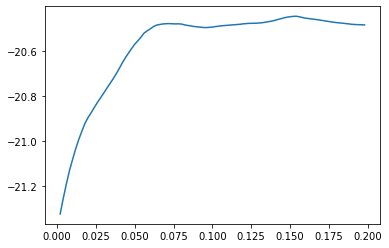

In [94]:
 # finding the best alpha value 
 alpha = []
 error = []

 for i in range(1,100):  
     alpha.append(i/500)
     lml = Lasso(alpha=(i/500))
     error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
 plt.plot(alpha,error)


In [71]:
 #to find show best alpha with least error
 err = tuple(zip(alpha,error))
 df_err = pd.DataFrame(err, columns = ['alpha','error'])
 df_err[df_err.error == max(df_err.error)]

,alpha,error
65,0.132,-19.25675


### random forest
The random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual treeThe random forest is a classification algorithm consisting of many decisions trees. It uses bagging and feature randomness when building each individual tree to try to create an uncorrelated forest of trees whose prediction by committee is more accurate than that of any individual tree

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(criterion='mse', n_estimators=80, random_state=78)
rf.fit(X_train,y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 15))

/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` wh

-14.031139714885805

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(rf.score(X_test, y_test))

0.7963243287580611


In [19]:
feature_importances = pd.DataFrame(rf.feature_importances_,
                                  index = X_train.columns,
                                   columns=["importance"]).sort_values('importance',ascending=False)
feature_importances

,importance
job_simp_analyst,0.093484
job_simp_data scientist,0.092638
job_state_CA,0.079308
seniority_na,0.065974
job_simp_director,0.060784
...,...
Type of ownership_School / School District,0.000042
Type of ownership_-1,0.000030
Sector_Accounting & Legal,0.000025
Sector_Agriculture & Forestry,0.000022


In [171]:
Y_pred_rf = rf.predict(X_test)

In [188]:
sal_pred = rf.predict([[1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]])
sal_pred

/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([103.13425595])

0.7963243287580611


### tune using gridsearchCSV

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)

gs.best_score_
gs.best_estimator_

In [74]:
gs.best_score_


-14.81486096156147

In [97]:
# rf = gs.best_estimator_

rf.fit(X_train,y_train)
y_pred = rf.predict(X_train)
y_pred

array([ 66.32      , 105.059     , 138.75875   , 141.02035714,
        99.445     ,  70.76      ,  88.83      ,  98.655     ,
       100.28945437, 140.49      ,  85.69      , 118.185     ,
        77.51      ,  65.77746627, 112.35      ,  95.79      ,
        91.63742857,  84.725     ,  70.695     ,  84.785     ,
        76.81      ,  70.01      , 161.53      , 122.05733333,
       101.55      ,  53.06      ,  64.84      , 133.52571429,
        90.18      , 108.98      ,  92.04      , 148.86633333,
       112.951     , 140.805     ,  70.455     ,  80.525     ,
        90.505     ,  76.34      , 101.67875   ,  84.205     ,
       111.835     , 111.52      , 104.695     ,  88.97      ,
        54.4       , 140.025     ,  90.705     , 139.405     ,
        92.96      , 150.9       , 127.755     , 141.99      ,
       103.94914286, 116.905     , 104.4725    ,  69.19      ,
        72.75458333, 113.455     ,  87.255     , 108.98      ,
        87.605     ,  86.53      , 124.38      , 133.52

In [79]:
gs.best_estimator_

RandomForestRegressor(criterion='mse', n_estimators=80)

### test

In [99]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = rf.fit(X_train,y_train).predict(X_test)


tpred_rf

array([111.405     ,  53.99      , 148.8022381 , 129.145     ,
       172.855     , 117.94      , 147.63      ,  54.105     ,
        55.9115    ,  67.138     , 169.22225   ,  61.555     ,
       104.71      , 125.5795754 ,  93.84914286, 138.145     ,
        67.21625   ,  73.0825    , 109.545     , 100.2025    ,
       104.475     , 146.64      , 148.58      , 113.675     ,
       157.605     , 102.095     ,  66.37625   , 144.2425    ,
        97.43      , 100.115     ,  81.2075    ,  54.465     ,
       127.245     , 102.675     ,  99.73      ,  90.275     ,
        90.105     , 113.05375   ,  67.51625   , 120.505     ,
       232.15275   , 121.97      ,  89.5042702 ,  98.82959867,
       162.53875   ,  77.01      , 137.735     , 118.87399405,
       130.27      , 110.715     , 115.046     ,  84.05      ,
        76.76      , 110.02      ,  87.06      , 120.44      ,
        89.5042702 ,  67.98625   , 232.15275   , 154.98625   ,
       124.3075    , 105.20442857, 103.235     , 135.36

In [100]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
#liner model



553026781862.7677

In [101]:
mean_absolute_error(y_test,tpred_lml)
#lasso

19.844943514677944

In [102]:
mean_absolute_error(y_test,tpred_rf)
#random forest
##best model


11.486038549817073

In [103]:
mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)


276513390936.0821

In [130]:
#pickle the model, this makes it useable by other programs without needing to retrained 
import pickle
pickl = {'model': rf}
pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )



In [131]:

#test to make sure the model works 
file_name = "model_file.p"
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']



In [134]:
model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]



/Users/fritz/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


52.99375

In [135]:
list(X_test.iloc[1,:])

[0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0]